In [1]:
import numpy as np

from pulse2percept import electrode2currentmap as e2cm
from pulse2percept import effectivecurrent2brightness as ec2b
from pulse2percept import oyster

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# Create a retina, rotate it by 4 deg
r_rot = 4.0
axon_x, axon_y = oyster.jansonius(100, 801, rot=r_rot * np.pi / 180)
axon_x = np.array(axon_x)
axon_y = np.array(axon_y)

In [40]:
# Place an Argus I array on the retina
arg_x_center = -940.69
arg_y_center = 111.15
arg_h = 0
arg_rot = 38.0 / 180.0 * np.pi
argus = e2cm.ArgusI(arg_x_center, arg_y_center, arg_h, arg_rot)

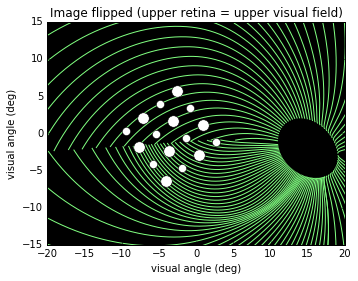

In [41]:
fig, ax = plt.subplots(1)
ax.set_axis_bgcolor('black')
ax.plot(axon_x, -axon_y, c=(0.5, 1, 0.5))

for e in argus.electrodes:
    ax.plot(e2cm.micron2deg(e.x), -e2cm.micron2deg(e.y), 'ow', markersize=np.sqrt(e.r/2))
ax.set_aspect('equal')
ax.set_xlim(-20, 20)
ax.set_xlabel('visual angle (deg)')
ax.set_ylim(-15, 15)
ax.set_ylabel('visual angle (deg)')
ax.set_title('Image flipped (upper retina = upper visual field)')
fig.savefig('jansonius_argusI.eps')